In [1]:
from pathlib import Path
import sys
PROJECT_ROOT = Path.cwd().parent
SRC = PROJECT_ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))
print("Using SRC:", SRC)


Using SRC: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\src


# 01 — Validación del modelo SD (SEIR análogo con retrasos)

In [2]:

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1] / "src"))

from sd_model.params import Params
from sd_model.experiments import base_run, no_delay_run


In [3]:

# Simulación base (con retrasos)
out = base_run(Params())

# Simulación sin retraso (k=1, alpha alto)
out_nd = no_delay_run(Params())


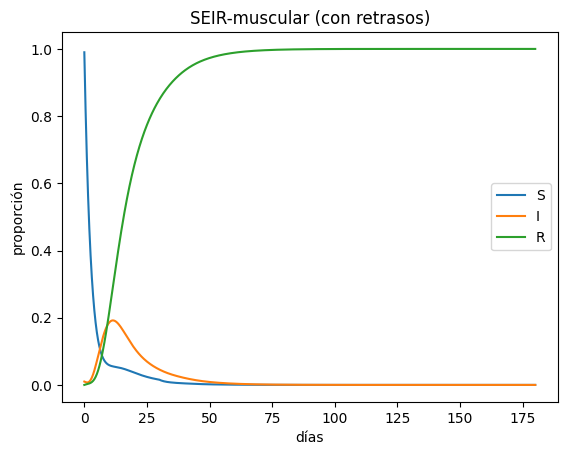

In [4]:

# Plot stocks S, I, R (serie base)
plt.figure()
plt.plot(out["t"], out["S"], label="S")
plt.plot(out["t"], out["I"], label="I")
plt.plot(out["t"], out["R"], label="R")
plt.title("SEIR-muscular (con retrasos)")
plt.xlabel("días"); plt.ylabel("proporción")
plt.legend()
plt.show()


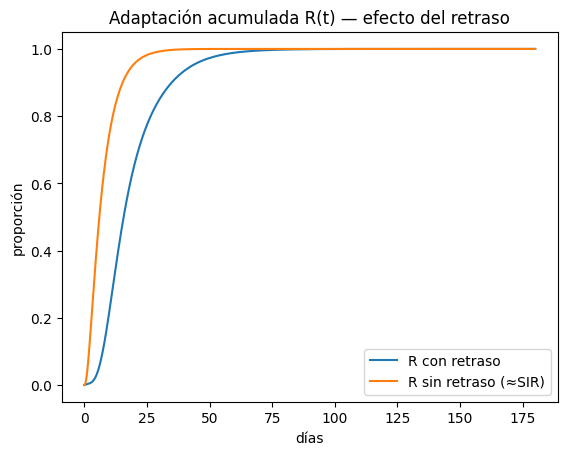

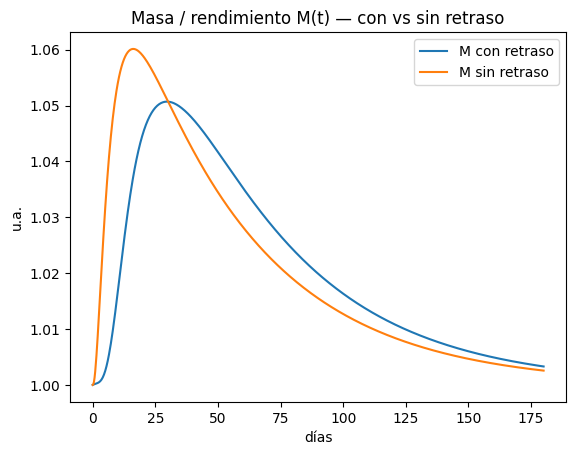

In [5]:

# Comparación con/sin retraso en R (adaptación) y M (masa)
plt.figure()
plt.plot(out["t"], out["R"], label="R con retraso")
plt.plot(out_nd["t"], out_nd["R"], label="R sin retraso (≈SIR)")
plt.title("Adaptación acumulada R(t) — efecto del retraso")
plt.xlabel("días"); plt.ylabel("proporción")
plt.legend()
plt.show()

plt.figure()
plt.plot(out["t"], out["M"], label="M con retraso")
plt.plot(out_nd["t"], out_nd["M"], label="M sin retraso")
plt.title("Masa / rendimiento M(t) — con vs sin retraso")
plt.xlabel("días"); plt.ylabel("u.a.")
plt.legend()
plt.show()



**Notas**  
- El retraso (cadena Erlang) suaviza y *desfasea* la respuesta observada de R y M.  
- El bloque de **deload** (días 90–100) aumenta la tasa de adaptación efectiva (γ) y reduce la recaída (φ), lo que se traduce en un repunte transitorio.
